## Применяю ЦПТ, ЗБЧ и различные распределения на практике и парадоксах

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

### 1. Парадокс Берксона

Предположим, что результаты ЕГЭ школьников по русскому и математике независимы и хорошо аппроксимируются 
нормальным распределением с ожиданием 60 и стандартным отклонением 10. 

УШЭ (Урюпинская Школа Экономики) ныне престижна и забирает себе всех школьников набравших более $n$ баллов в сумме по русскому и математике. 

Для каждого $n$ от $80$ до $160$ с шагом $5$ случайно создаем $10^4$ школьников и поделим их на прошедших и не прошедших в УШЭ.

Построим: 

а) График числа прошедших в УШЭ в зависимости от $n$. 

б) График выборочной корреляции между результатами по русскому и математике в зависимости от $n$ среди прошедших в УШЭ.

в)График выборочной корреляции между результатами по русскому и математике в зависимости от $n$ среди не прошедших в УШЭ.


In [2]:
norm_rus = stats.norm(loc=60, scale=10)
norm_math = stats.norm(loc=60, scale=10)

n_kids = 10 ** 4

n_range = np.arange(80, 161, 5)

passed, failed, passed_corr, failed_corr = {}, {}, {}, {}
corr = {}

for n in n_range:
    # при каждом цикле будет создаваться новая случайность, т.к. random_state разный
    rus_res = norm_rus.rvs(n_kids, random_state=n)  
    math_res = norm_math.rvs(n_kids, random_state=n+943)
    results = rus_res + math_res
    
    # rus_res[results > n] - фильтруем только рез-ты по предмету, которые прошли в принципе
    passed[n] = len(results[results > n])
    failed[n] = len(results[results <= n])
    passed_corr[n] = np.corrcoef(rus_res[results > n], math_res[results > n])[0, 1]
    failed_corr[n] = np.corrcoef(rus_res[results <= n], math_res[results <= n])[0, 1]
    corr[n] = np.corrcoef(rus_res, math_res)[0, 1]


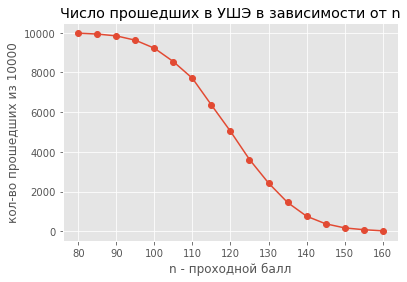

In [3]:
# a)
plt.plot(passed.keys(), passed.values(), '-o')
plt.title('Число прошедших в УШЭ в зависимости от n')
plt.xlabel('n - проходной балл')
plt.ylabel('кол-во прошедших из 10000')
plt.show();

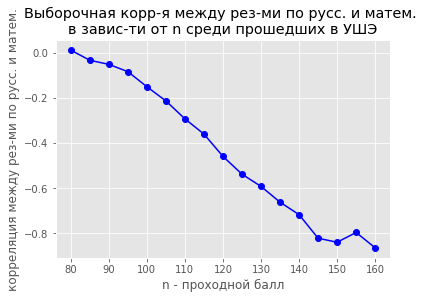

In [4]:
# б)
plt.plot(passed_corr.keys(), passed_corr.values(), '-o', c='b')
plt.title('Выборочная корр-я между рез-ми по русс. и матем. \nв завис-ти от n среди прошедших в УШЭ')
plt.xlabel('n - проходной балл')
plt.ylabel('корреляция между рез-ми по русс. и матем.')
plt.show();

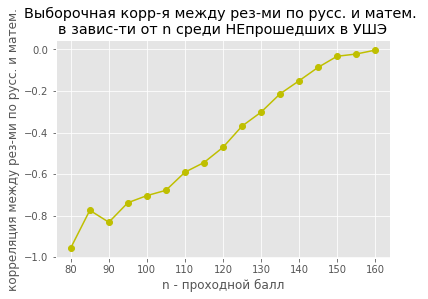

In [5]:
# в)
plt.plot(failed_corr.keys(), failed_corr.values(), '-o', c='y')
plt.title('Выборочная корр-я между рез-ми по русс. и матем. \nв завис-ти от n среди НЕпрошедших в УШЭ')
plt.xlabel('n - проходной балл')
plt.ylabel('корреляция между рез-ми по русс. и матем.')
plt.show();

**Комментарий парадокса:**
* По графику a) видно, что число прошедших в УШЭ в завис-ти от проходного балла имеет функцию распределения идентичную функции нормального распределения симметричную относительно $y=10^4/2$. 
При этом ровно половина школьников проходит если проходной балл будет равен $\mu_{rus}+ \mu_{math}$, что соответствует ожиданиям по мат. ожиданию норм. расп. с.в., полученной при сложении двух норм. расп с.в.  

* По графику б) можно сделать вывод, что среди прошедших в УШЭ при увеличении значения проходного балла увеличивается обратная корреляция между баллами по русскому и матем., т.е. чем больше балл по русскому, тем меньше будет балл по матем. среди поступивших. 

> Случился парадокс Берксона - два независимых события (балл по русс. и матем.) становятся условно зависимыми, если произошло некоторое третье событие (поступление в УШЭ). 

> Мы ожидаем, что если человек хорошо написал матем., то ничего нельзя сказать о результатах по русс., т.к. рез-т по матем. и русс. - независимые с.в. по условию. А оказывается, что появляется отрицательная корреляция среди поступивших между экзаменами. Нужно отметить, что данная корреляция условная, т.к. появляется третий фактор поступления, но данный вывод нельзя распространять на генеральную совокупность, т.е. на всех школьников среди поступающих. На ген. свовокупности рез-ты должны быть независимы (что видно из графика ниже, где построена корреляция результатов экзаменов в завис-ти от n среди всех школьников, которая находится все время около 0 при любом n). 
При этом если проходной балл маленький, то поступает больше народу => независимость рез-в сохраняется, т.к. берут почти всех, а у всех эта независимость и есть.

* Из графика в) можно сделать аналогичный вывод, что появляется 3-й фактор - непоступление в УШЭ, который показывает отрицательную корреляцию результатов экзаменов, стремящейся к 0 при увеличении проходного балла - т.е. не поступает все большое кол-во школьников, близкое к числу в ген. совокупности, а значит появлется большая реальная независимость результатов. 
И все также, на всех школьников этот вывод о корреляции распространить нельзя 

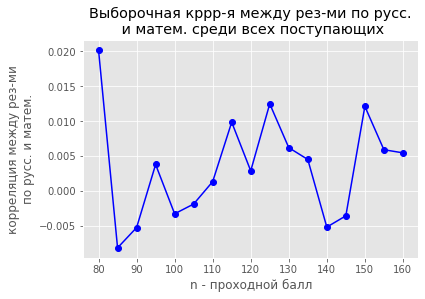

In [6]:
plt.plot(corr.keys(), corr.values(), '-o', c='b')
plt.title('Выборочная кррр-я между рез-ми по русс.\n и матем. среди всех поступающих')
plt.xlabel('n - проходной балл')
plt.ylabel('корреляция между рез-ми\nпо русс. и матем.')
plt.show();

### Парадокс инспектора

Автобусы отходят от автостанции с 8:00 до 20:00. Первый автобус отходит ровно в 8:00. Затем интервалы между автобусами случайны, независимы и равновероятно равны либо 5-и, либо 10-и минутам. Будем считать, что за минуту на автостанцию приходит ровно один пассажир, и все пассажиры едут ближайшим автобусом.

Проведем $10^4$ экспериментов и с их помощью:

а) Построим гистограмму количества автобусов, отошедших от автостанции за сутки.

б) Инспектор Тимон выбирает равновероятно один из всех автобусов отошедших от автостанции за сутки. Построим гистограмму числа пассажиров на этом автобусе и оценим математическое ожидание и дисперсию этого числа.

в) Инспектор Пумба приходит на автостанцию в случайный момент времени, равномерный от 8:00 до 20:00 и садится в первый пришедший автобус. Построим гистограмму числа пассажиров на этом автобусе и оценим математическое ожидание и дисперсию этого числа.

г) Посмотрим как изменится положение, если время между автобусами будет экспоненциально со средним в 10 минут?


In [7]:
%%time
n_experiments = 10 ** 4

intervals_arr = []
working_mins = (20 - 8) * 60
max_buses = working_mins / 5
min_buses = working_mins / 10
n_buses = np.array([])

for i in np.arange(n_experiments):
# в сумме все интервалы м/у автобусами дают 720=(20 - 8) * 60 или 725 
# 725 - если в 19:55 интервал 10 минут до след. автобуса, то он не приедет,
# поэтому будет кол-во автобусов, сумма интервалов которых 725, уменьшаем на 1 не приезжающий в 20:05
    for n in np.arange(min_buses, max_buses+1):
        # фиксируем случайность для каждого эксперимента, чтобы потом случайно добавлять недотающие автобусы до 20:00
        np.random.seed(i+42)  
        bus_arrivals = np.random.choice([5, 10], size=int(n))
        if bus_arrivals.sum() == working_mins:
            intervals_arr.append(bus_arrivals)
            n_buses = np.append(n_buses, n)
            break
        if bus_arrivals.sum() == working_mins + 5:
            intervals_arr.append(bus_arrivals[:-1]) # не берем в счет приезжающий в 20:05
            n_buses = np.append(n_buses, n-1)
            break
        else:
            continue

CPU times: total: 23 s
Wall time: 23.2 s


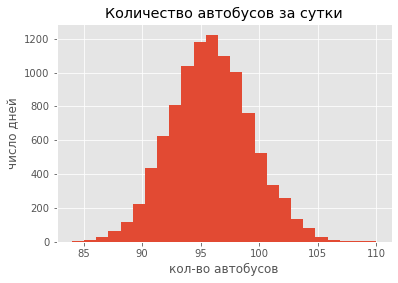

In [8]:
# а)
plt.hist(n_buses, bins=25)
plt.title('Количество автобусов за сутки')
plt.xlabel('кол-во автобусов')
plt.ylabel('число дней')
plt.show();

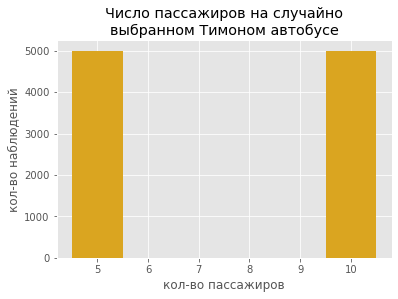

Мат. ожидание: 7.50, Дисперсия: 6.25


In [9]:
# б)
# успевает накопиться столько пассажиров, сколько ждать след. автобуса - т.е. либо 5 либо 10

timon_people = np.array([])
for interval in intervals_arr:
    np.random.seed(len(timon_people))
    timon_people = np.append(timon_people, np.random.choice(interval))    
    
plt.hist(timon_people, bins = range(5, 12), align='left', color='goldenrod')
plt.title('Число пассажиров на случайно\nвыбранном Тимоном автобусе')
plt.xlabel('кол-во пассажиров')
plt.ylabel('кол-во наблюдений')
plt.show();

print(f'Мат. ожидание: {timon_people.mean():.2f}, Дисперсия: {timon_people.var():.2f}')

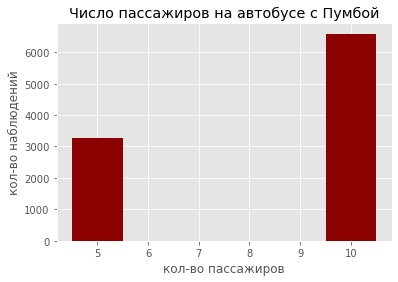

Мат. ожидание: 8.34, Дисперсия: 5.54


In [11]:
# в)
# значит в любую минуту от 0 до 720
pumba_people = np.array([])

for i, interval in enumerate(intervals_arr):
    np.random.seed(i)
    pumba_time = np.random.choice(np.arange(0, (20-8)*60 + 1))
    mins = pumba_time % 60
    if len(str(mins)) == 1:
        mins = "0" + str(mins)
        
#     просто смотрел как время генерирую
#     print(f'pumba_time={pumba_time}, Пумба поедет в {8 + pumba_time // 60}:{mins}')

    cumulative_interval = np.cumsum(interval)
    if pumba_time >= cumulative_interval[-1]: # если пришел позднее последнего автобуса, то он никуда не едет - не берем в счет
        continue    
    for i in np.arange(len(cumulative_interval)):
        if cumulative_interval[i] <= pumba_time and cumulative_interval[i+1] >= pumba_time:
            pumba_people = np.append(pumba_people, interval[i+1]) # i+1 т.к. он поедет со следующими
            break
    
plt.hist(pumba_people, bins = range(5, 12), align='left', color='darkred')
plt.title('Число пассажиров на автобусе c Пумбой')
plt.xlabel('кол-во пассажиров')
plt.ylabel('кол-во наблюдений')
plt.show();

print(f'Мат. ожидание: {pumba_people.mean():.2f}, Дисперсия: {pumba_people.var():.2f}')

In [12]:
%%time
# г.1)
n_experiments = 10 ** 4
exp_rv = stats.expon(loc=10)

intervals_arr = []
working_mins = (20 - 8) * 60
max_buses = working_mins / 5
min_buses = working_mins / 10
n_buses = np.array([])

for i in np.arange(n_experiments):
    for n in np.arange(720):
        # фиксируем случайность для каждого эксперимента, чтобы потом случайно добавлять недотающие автобусы до 20:00
        np.random.seed(i)  
        bus_arrivals = exp_rv.rvs(size=int(n))
        if bus_arrivals.sum() == working_mins:
            intervals_arr.append(bus_arrivals)
            n_buses = np.append(n_buses, n)
            break
        if bus_arrivals.sum() > working_mins:
            intervals_arr.append(bus_arrivals[:-1]) # не берем в счет приезжающий в 20:05
            n_buses = np.append(n_buses, n-1)
            break
        else:
            continue

CPU times: total: 1min 38s
Wall time: 1min 41s


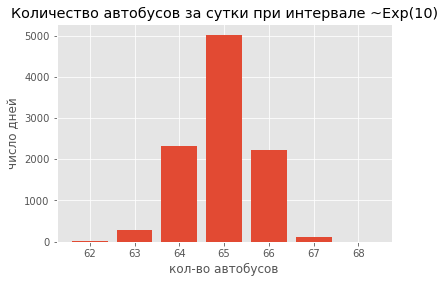

In [13]:
from collections import Counter
dict_n_buses = Counter(n_buses) # криво на гистограме выглядит, поэтому подогнал под barplot
    
plt.bar(dict_n_buses.keys(), dict_n_buses.values())
plt.title('Количество автобусов за сутки при интервале ~Exp(10)')
plt.xlabel('кол-во автобусов')
plt.ylabel('число дней')
plt.show();

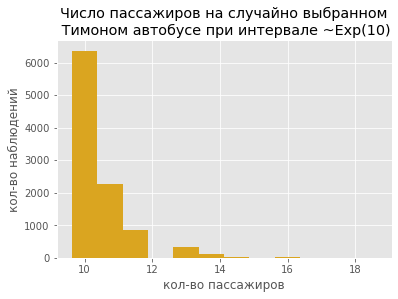

Мат. ожидание: 10.58, Дисперсия: 0.90


In [14]:
# г.2)
# успевает накопиться столько пассажиров, сколько ждать след. автобуса - т.е. округленное

timon_people = np.array([])
for interval in intervals_arr:
    np.random.seed(len(timon_people)+1)
    timon_people = np.append(timon_people, int(np.random.choice(interval)))
    
plt.hist(timon_people, bins=12, align='left', color='goldenrod')
plt.title('Число пассажиров на случайно выбранном\n Тимоном автобусе при интервале ~Exp(10)')
plt.xlabel('кол-во пассажиров')
plt.ylabel('кол-во наблюдений')
plt.show();

print(f'Мат. ожидание: {timon_people.mean():.2f}, Дисперсия: {timon_people.var():.2f}')

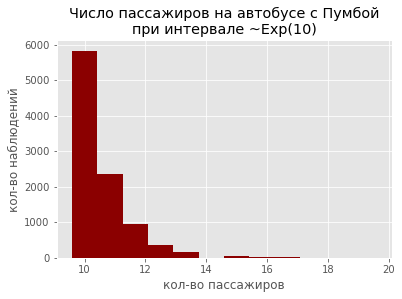

Мат. ожидание: 10.67, Дисперсия: 1.12


In [15]:
# г.3)
# значит в любую минуту от 0 до 720
pumba_people = np.array([])

for i, interval in enumerate(intervals_arr):
    np.random.seed(i)
    pumba_time = np.random.choice(np.arange(0, (20-8)*60 + 1))
    mins = pumba_time % 60
    if len(str(mins)) == 1:
        mins = "0" + str(mins)
    
#     просто смотрел как время генерирую
#     print(f'pumba_time={pumba_time}, Пумба поедет в {8 + pumba_time // 60}:{mins}')

    cumulative_interval = np.cumsum(interval)
    if pumba_time >= cumulative_interval[-1]: # если пришел позднее последнего автобуса, то он никуда не едет - не берем в счет
        continue    
    for i in np.arange(len(cumulative_interval)):
        if cumulative_interval[i] <= pumba_time and cumulative_interval[i+1] >= pumba_time:
            pumba_people = np.append(pumba_people, int(interval[i+1])) # i+1 т.к. он поедет со следующими
            break
    
plt.hist(pumba_people, bins=12, align='left', color='darkred')
plt.title('Число пассажиров на автобусе c Пумбой\nпри интервале ~Exp(10)')
plt.xlabel('кол-во пассажиров')
plt.ylabel('кол-во наблюдений')
plt.show();

print(f'Мат. ожидание: {pumba_people.mean():.2f}, Дисперсия: {pumba_people.var():.2f}')

**Комментарий:**

* Распределение в п. а) визуально похоже на нормальное, что в целом соответствует нашим ожиданиям по ЦПТ когда при большом n распределение асимптотически будет сходится к нормальному

* Тимон равновероятно выбирает автобусы в течение дня. На любом из этих автобусов равновероятно будет ехать либо 5, либо 10 человек. Поэтому получилось примерно одинаквое количество автобусов с 5 и 10 пассажирами в экспериментах Тимона. Распределение кол-ва пассажиров по замерам Тимона получилось со средним между 5 и 10 (7.5) и дисперсии - если б было 2 исхода 5 и 10 (6.25).

* Пумба равновероятно выбирает не автобус, а время когда прийти на остановку. В его распределении числа пассажиров больше автобусов с 10 пассажирами. Параметры этого распределения: $\mu=8.34$ , $\sigma^2=5.54$, т.е. в среднем пумба замерил больше пассажиров на автобусах чем Тимон

> Случился парадокс инспектора. Он связан с тем, что Тимон усредняет пассажиров на автобусах, при этом автобус выбирается равновероятно. А Пумба усредняет пассажиров на автобусах, на которые он случайно попал, случайно выбрав время прихода. Но, случайно выбирая время прихода, вероятность прийти на автобус с большим кол-вом пассажиров выше, т.к. его просто дольше ждать (его приезд занимает больший промежуток от 8:00 до 20:00) и, следовательно, на нем будет больше пассажиров. *Если не различать методы выбора/усреднения пассажиров между двумя этими инспекторами, можно прийти к неверным выводам. Если усредняя по автобусам пассажиров будет мало, то усредняя по случайно выбранным промежуткам времени, можно найти куда большую заполненность автобуса. Т.е. автобусы с большим числом людей будут попадаться чаще, а значит они будут увеличивать среднее значение числа людей*

* Если время между автобусами распределено экспоненциально со средним 10, то распределение числа пассажиров и будут более похожими и визуально, и судя по параметрам. 
Причина: - теперь когда Тимон выбирает автобус, он усреднит все значения числа пассажиров на них и получит число близкое к среднему, т.е. 10; - а Пумба, выбирая время когда прийти, будет чаще попадать на промежутки времени ожидания близкие к среднему (10) (интервалов ожидания больше 10 минут гораздо меньше, чем близких к 10-минутному), поэтому он просто реже будет находить автобусы с более чем 10 пассажирами, а значит распределение будет близко к распределению Тимона


### 3. что-то похожее на ЦПТ, но в обратную сторону

Пусть $X \sim N(0, \sigma^2)$. Пусть $\Phi(x)$ — функция распределения для $N(0,1)$. Нужно найти математическое ожидание для случайной величины $\Phi(X)$. 

__а) [2.5 балла]__ Оцените $\mathbb{E}(\Phi(X))$ с помощью симуляций

__б) [2.5 балла]__ Постройте для случайной величины $\Phi(X)$ гистограмму. Возьмите $\sigma = 1$, после $\sigma = 3$, после $\sigma = 100$. Как ведёт себя распределение при росте дисперсии? Как думаете, к какой случайной величине сойдётся это распределение?

In [16]:
n_obs = 10**6
# N(0, 1)
st_norm = stats.norm(loc=0, scale=1)

# X ~ N(0, sigma**2) - выбор сигмы тут не так значим, поэтому будем выбирать случайно
sigma_2 = np.random.randint(1, 36)
X = stats.norm(loc=0, scale=sigma_2)

print(f'Генерация 1: 𝔼(Ф(𝑋)) = {st_norm.cdf(X.rvs(size=n_obs)).mean():.6f}')
print(f'Генерация 2: 𝔼(Ф(𝑋)) = {st_norm.cdf(X.rvs(size=n_obs)).mean():.6f}')
print(f'Генерация 3: 𝔼(Ф(𝑋)) = {st_norm.cdf(X.rvs(size=n_obs)).mean():.6f}')
print(f'Генерация 4: 𝔼(Ф(𝑋)) = {st_norm.cdf(X.rvs(size=n_obs)).mean():.6f}')



Генерация 1: 𝔼(Ф(𝑋)) = 0.500815
Генерация 2: 𝔼(Ф(𝑋)) = 0.500324
Генерация 3: 𝔼(Ф(𝑋)) = 0.500420
Генерация 4: 𝔼(Ф(𝑋)) = 0.500014


> a) Мат. ожидание от $\mathbb{E}(\Phi(X)) = 0.5$

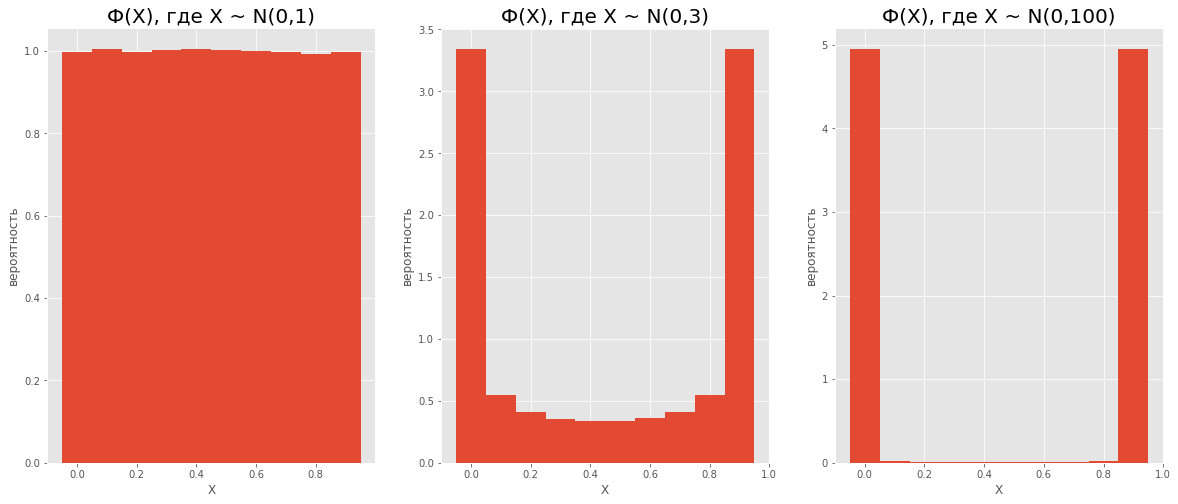

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

X = stats.norm(loc=0, scale=1)
ax[0].set_title('Ф(X), где X ~ N(0,1)', size=20)
ax[0].set_xlabel('X')
ax[0].set_ylabel('вероятность')
ax[0].hist(st_norm.cdf(X.rvs(size=10**6)), align='left', density=True)

X = stats.norm(loc=0, scale=3)
ax[1].set_title('Ф(X), где X ~ N(0,3)', size=20)
ax[1].set_xlabel('X')
ax[1].set_ylabel('вероятность')
ax[1].hist(st_norm.cdf(X.rvs(size=10**6)), align='left', density=True)

X = stats.norm(loc=0, scale=100)
ax[2].set_title('Ф(X), где X ~ N(0,100)', size=20)
ax[2].set_xlabel('X')
ax[2].set_ylabel('вероятность')
ax[2].hist(st_norm.cdf(X.rvs(size=10**6)), align='left', density=True);


**Комментарий:**
* При $\sigma = 1$ распределение похоже на равномерное $U(0,1)$
* При увеличении $\sigma$ мы все больше получаем распределение, которое равновероятно принимает значение 0 или 1. Т.е. распределение сойдется к $Bern(p)$, где $p=0.5$

### 5. Проверяю свойства оценок

У Дианы есть выборка $X_1, \dots, X_n \sim iid N(0, \sigma^2)$. Она собирается использовать для параметра $\sigma$ нестандартную оценку $\hat \sigma = \frac{1}{n} \sum_{i=1}^n |x_i|$. 

Пусть природа решила, что $\sigma^2 = 16$. 

а) С помощью симуляций проверим несмещённость и состоятельность оценки.

б) Сравним эффективность $\hat \sigma$ и классической $\hat s$ 


E(sigma2_hat) = 10.0831, sigma2 = 16 => оценка смещена


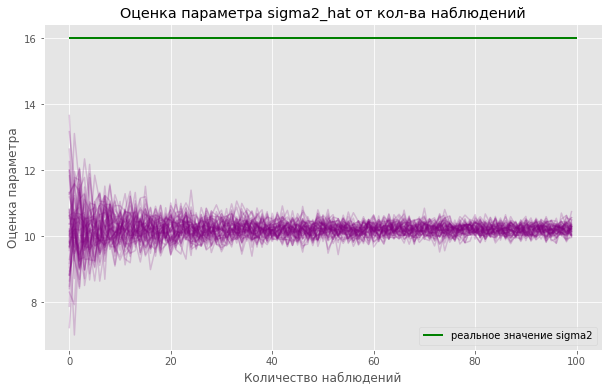

In [19]:
sigma2 = 16
n_obs = 10**5

# гененируем x1, x2, ... x_n
norm_rv = stats.norm(loc=0, scale=sigma2**(1/2))
x = norm_rv.rvs(n_obs, random_state=42)

# a) несмещенность
# набираем 200 раз выборку по 100 наблюдений и измеряем для каждой из выборок по формуле sigma_hat
n = 100
sigma2_hat = np.zeros(200)

for i in range(200):
    x_sample = np.random.choice(x, size=n, replace=False)
    sigma_hat = np.mean(abs(x_sample))
    sigma2_hat[i] = sigma_hat ** 2

print(f'E(sigma2_hat) = {np.mean(sigma2_hat):.4f}, sigma2 = {sigma2} => оценка смещена')

# а) состоятельность, т.е. теперь увеличиваем n с каждым набором выборок
# набираем 50 выборок по n наблюдений
sigma2_hat = np.zeros((100, 50))

for n in range(100, 10**4+100, 100): 
    x_sample = np.random.choice(x, size = (n, 50))
    sigma_hat = np.mean(abs(x_sample), axis=0)
    sigma2_hat[n//100 - 1] = sigma_hat ** 2
    

plt.figure(figsize=(10,6))
plt.plot(sigma2_hat, c='purple', alpha = 0.2)

plt.xlabel('Количество наблюдений')
plt.ylabel('Оценка параметра')

plt.hlines(sigma2, 0, 100, color='g', lw=2, label='реальное значение sigma2')
plt.legend(fontsize=10, loc='lower right');
plt.title('Оценка параметра sigma2_hat от кол-ва наблюдений')
plt.show();

> Все построено для $\sigma^2$

Оценка смещена. 

При $n\rightarrow\infty$, оценка сходится к const, но из-за смещенности не к той, поэтому оценка несостоятельна

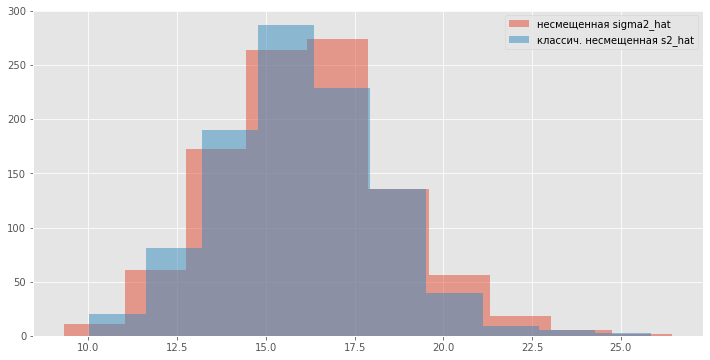

In [20]:
# б) скорректируем смещенную оценку sigma_hat (np.sqrt(np.pi/2))
n_obs = 100

x = norm_rv.rvs(size = (n_obs, 1000), random_state=42)

s_new = np.mean(abs(x), axis=0) * (np.sqrt(np.pi/2)) 
s_new = s_new ** 2
s_classic = np.var(x, axis=0, ddof=1)

plt.figure(figsize=(12,6))
plt.hist(s_new, alpha=0.5, label='несмещенная sigma2_hat')
plt.hist(s_classic, alpha=0.5, label='классич. несмещенная s2_hat')
plt.legend();

In [21]:
print(f'Дисперсия sigma2_hat: {s_new.var():.4f}, Дисперсия классической s2: {s_classic.var():.4f}')

Дисперсия sigma2_hat: 5.9176, Дисперсия классической s2: 5.1812


Классическая оценка $\hat s$ эффективнее, т.к. ее дисперсия меньше, чем у $\hat \sigma$ 